# Visual search with k-NN

>*The idea here is to implement a little search engine based on the high-level image representation and k-nearest neighbors*
> * *Fit and tune a k-NN classifier*
> * *Pick an image from the test set and plot its 10 nearest neighbors from the train set*

>*Hint: take a look at the kneighbors() method from Scikit-learn k-NN estimators.*

In [1]:
import numpy as np

In [2]:
# Load features and labels from npz files
with np.load('train.npz', allow_pickle=False) as npz_file:
    X_train=npz_file['features']
    y_train=npz_file['labels']
    # for the second part of the exercise
    train_images = npz_file['images']

with np.load('valid.npz', allow_pickle=False) as npz_file:
    X_valid=npz_file['features']
    y_valid=npz_file['labels']

with np.load('test.npz', allow_pickle=False) as npz_file:
    X_test=npz_file['features']
    y_test=npz_file['labels']
    # for the second part of the exercise
    test_images = npz_file['images']

### Fit and tune a k-NN classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a k-NN pipeline
pipe = Pipeline([
    #('scaler', StandardScaler()), # better without standardization
    ('knn', KNeighborsClassifier())
])

In [4]:
from sklearn.model_selection import ParameterGrid

# A first grid of parameters - start with a few k values
grid = ParameterGrid({
    'knn__n_neighbors': np.arange(1,15), # k
    'knn__weights': ['uniform', 'distance'], # Weighting function
    'knn__p': [1, 2], # L1 and L2 distance metrics
})

# Print the number of combinations
print('Number of combinations:', len(grid))

Number of combinations: 56


In [5]:
# Save accuracy on test set
test_scores = []

# Enumerate combinations starting from 1
for i, params_dict in enumerate(grid, 1):
    # Print progress
    print('Combination {}/{}'.format(
        i, len(grid) # Total number of combinations
    ))
    
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_train, y_train)

    # Save accuracy on validation set
    valid_accuracy=pipe.score(X_valid, y_valid)
    params_dict['valid accuracy'] = '{:.3f}'.format(valid_accuracy)
    
    # Save accuracy on test set
    test_accuracy=pipe.score(X_test, y_test)
    params_dict['test accuracy'] ='{:.3f}'.format(test_accuracy)

    # Save result
    test_scores.append(params_dict)

print('done')

Combination 1/56
Combination 2/56
Combination 3/56
Combination 4/56
Combination 5/56
Combination 6/56
Combination 7/56
Combination 8/56
Combination 9/56
Combination 10/56
Combination 11/56
Combination 12/56
Combination 13/56
Combination 14/56
Combination 15/56
Combination 16/56
Combination 17/56
Combination 18/56
Combination 19/56
Combination 20/56
Combination 21/56
Combination 22/56
Combination 23/56
Combination 24/56
Combination 25/56
Combination 26/56
Combination 27/56
Combination 28/56
Combination 29/56
Combination 30/56
Combination 31/56
Combination 32/56
Combination 33/56
Combination 34/56
Combination 35/56
Combination 36/56
Combination 37/56
Combination 38/56
Combination 39/56
Combination 40/56
Combination 41/56
Combination 42/56
Combination 43/56
Combination 44/56
Combination 45/56
Combination 46/56
Combination 47/56
Combination 48/56
Combination 49/56
Combination 50/56
Combination 51/56
Combination 52/56
Combination 53/56
Combination 54/56
Combination 55/56
Combination 56/56
d

In [6]:
import pandas as pd
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Print scores
scores_df.sort_values(by='test accuracy', ascending=False).head(5)

,knn__n_neighbors,knn__p,knn__weights,test accuracy,valid accuracy
55,14,2,distance,0.980,0.871
30,8,2,uniform,0.980,0.892
31,8,2,distance,0.980,0.892
27,7,2,distance,0.980,0.885
26,7,2,uniform,0.980,0.892


In [7]:
# save results
results=pd.DataFrame({
        'model': ['k-NN'],
        'test_accuracy': scores_df['test accuracy'].max()
    })

In [8]:
# save results in csv file
results.to_csv('results.csv', index=False)

### Pick an image from the test set and plot its 10 nearest neighbors from the train set

In [9]:
from sklearn.neighbors import NearestNeighbors
# Unsupervised learner for implementing neighbor searches

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

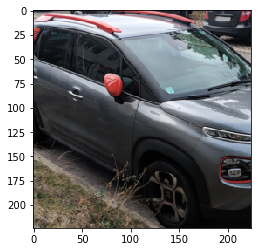

In [11]:
# pick one image from the test set
plt.imshow(test_images[20]);

In [12]:
# use n=8 and p=1 as these parameters had the best test accuracy 
neigh = NearestNeighbors(n_neighbors=8, p=1)
# train with the train set
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=8, p=1, radius=1.0)

In [13]:
nearest_neighbors=neigh.kneighbors(X=X_test, n_neighbors=8, return_distance=False)[20]

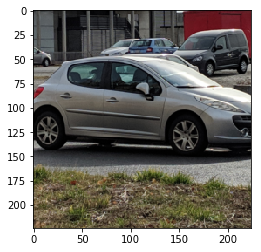

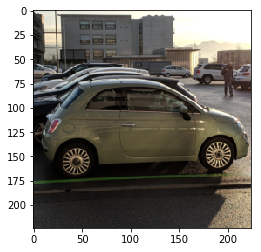

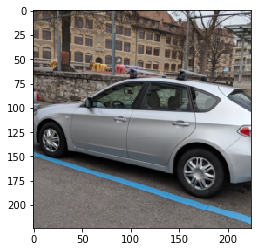

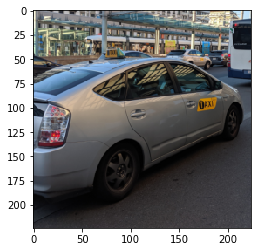

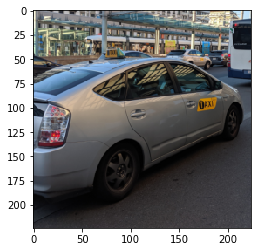

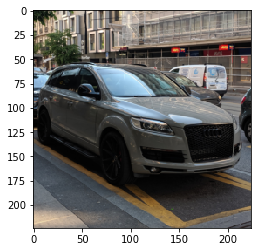

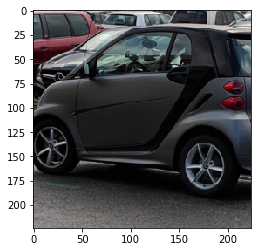

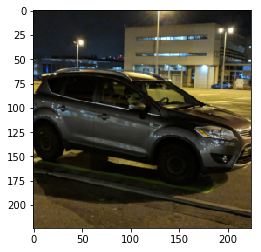

In [14]:
for neighbor in nearest_neighbors:
    plt.imshow(train_images[neighbor])
    plt.show()